#<center><strong>Customer Segmentation Model Data Science Portfolio</strong></center>
##<center><strong>By Akintoye Adesomoju</strong></center>
###<center><img src='https://www.corporatevision-news.com/wp-content/uploads/2022/10/Customer-Segmentation.jpg'></center>

###**Problem Statement**


Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

###**DataSet**

The data was sourced from <a href='https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis'> Kaggle </a>

###**Pre-loading Needed Libraries**

In [2]:
!pip install kneed==0.8.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install scikit-learn==1.2
!pip install dabl==0.2.4
# load needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import dabl
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###**Loading Dataset** 

In [5]:
# Storing the csv file into variable data
data = pd.read_csv('marketing_campaign 2.csv', sep='\t')

In [6]:
data.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1774,2694,1967,Graduation,Married,42664.0,0,1,18-03-2014,44,21,...,6,0,0,0,0,0,0,3,11,0
1512,9451,1965,Graduation,Married,73538.0,0,1,25-11-2012,92,811,...,7,0,0,0,0,0,0,3,11,0
976,2611,1959,Master,Together,82576.0,0,0,01-08-2012,66,1206,...,1,0,0,1,0,0,0,3,11,0
2138,2948,1954,Master,Divorced,62637.0,0,1,01-03-2014,76,104,...,2,0,0,0,0,0,0,3,11,0
1980,3032,1984,Graduation,Married,24570.0,1,0,27-02-2013,97,28,...,9,0,0,0,0,0,0,3,11,0
1469,4406,1970,Graduation,Together,67419.0,0,1,16-01-2013,29,846,...,5,0,0,0,0,0,0,3,11,0
1412,361,1969,Master,Married,43142.0,1,1,18-02-2014,84,5,...,7,0,0,0,0,0,0,3,11,0
1808,1619,1956,Graduation,Married,90369.0,0,0,28-04-2014,2,292,...,1,0,0,0,0,0,0,3,11,1
1322,9206,1968,Graduation,Together,77382.0,0,1,07-01-2014,36,491,...,1,0,0,1,0,0,0,3,11,0
230,6798,1966,Graduation,Single,37070.0,1,1,20-03-2013,30,231,...,7,0,0,0,0,0,0,3,11,1


In [7]:
count = 1 

for col in data.columns:
  print(f'{count}. {col}')
  count += 1

1. ID
2. Year_Birth
3. Education
4. Marital_Status
5. Income
6. Kidhome
7. Teenhome
8. Dt_Customer
9. Recency
10. MntWines
11. MntFruits
12. MntMeatProducts
13. MntFishProducts
14. MntSweetProducts
15. MntGoldProds
16. NumDealsPurchases
17. NumWebPurchases
18. NumCatalogPurchases
19. NumStorePurchases
20. NumWebVisitsMonth
21. AcceptedCmp3
22. AcceptedCmp4
23. AcceptedCmp5
24. AcceptedCmp1
25. AcceptedCmp2
26. Complain
27. Z_CostContact
28. Z_Revenue
29. Response


###**Data Attributes**



####**People**

#####ID: Customer's unique identifier
#####Year_Birth: Customer's birth year
#####Education: Customer's education level
#####Marital_Status: Customer's marital status
#####Income: Customer's yearly household income
#####Kidhome: Number of children in customer's household
#####Teenhome: Number of teenagers in customer's household
#####Dt_Customer: Date of customer's enrollment with the company
#####Recency: Number of days since customer's last purchase
#####Complain: 1 if the customer complained in the last 2 years, 0 otherwise

####**Products**

#####MntWines: Amount spent on wine in last 2 years
#####MntFruits: Amount spent on fruits in last 2 years
#####MntMeatProducts: Amount spent on meat in last 2 years
#####MntFishProducts: Amount spent on fish in last 2 years
#####MntSweetProducts: Amount spent on sweets in last 2 years
#####MntGoldProds: Amount spent on gold in last 2 years

####**Promotion**

#####NumDealsPurchases: Number of purchases made with a discount
#####AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#####AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
#####AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
#####AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
#####AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
#####Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

####**Place**

#####NumWebPurchases: Number of purchases made through the company’s website
#####NumCatalogPurchases: Number of purchases made using a catalogue
#####NumStorePurchases: Number of purchases made directly in stores
#####NumWebVisitsMonth: Number of visits to company’s website in the last month

###**Exploratory Data Analysis**

In [8]:
# We will create a new column for the sum of all the amounts
data['TtlAmtSpent'] = data['MntFishProducts']+data['MntFruits']+data['MntGoldProds']+data['MntMeatProducts']+data['MntWines']+data['MntSweetProducts']

In [9]:
# We create a new column age so we can group the customers
from datetime import datetime 
data['Age'] = data['Year_Birth'].apply(lambda x : datetime.now().year - x)

In [10]:
data.sample(10)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TtlAmtSpent,Age
1618,3011,1965,Graduation,Married,69139.0,0,1,27-01-2014,23,86,...,0,0,0,0,0,3,11,0,227,58
707,6991,1951,Graduation,Divorced,43185.0,0,1,10-04-2013,88,537,...,0,0,0,0,0,3,11,0,637,72
538,11096,1952,2n Cycle,Together,57247.0,0,1,08-08-2013,50,99,...,0,0,0,0,0,3,11,0,232,71
700,9977,1973,Graduation,Divorced,78901.0,0,1,17-09-2013,99,321,...,0,0,0,0,0,3,11,0,734,50
1870,3286,1967,PhD,Divorced,26642.0,1,0,01-03-2014,71,13,...,0,0,0,0,0,3,11,0,42,56
1956,8514,1976,Graduation,Together,29478.0,1,0,17-01-2014,59,8,...,0,0,0,0,0,3,11,0,20,47
1351,5080,1993,Graduation,Single,70515.0,0,0,21-10-2013,12,420,...,0,0,0,0,0,3,11,1,1258,30
150,3830,1953,Master,Married,59354.0,0,2,24-04-2014,59,295,...,0,0,0,0,0,3,11,0,459,70
898,7037,1974,PhD,Married,37087.0,1,0,11-08-2013,50,194,...,0,0,0,0,0,3,11,0,401,49
489,3921,1952,2n Cycle,Widow,28457.0,0,0,28-10-2012,96,24,...,0,0,0,0,0,3,11,0,205,71


In [11]:
data['Age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

##### We can see that the most prevalent age range is 50-60.

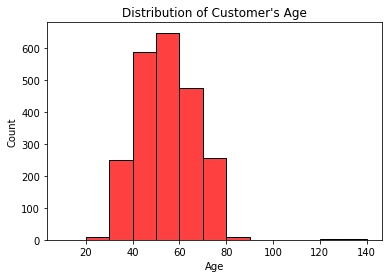

In [12]:
# BreakDown of Customer Age 
sns.histplot(data=data, x='Age', bins = list(range(10,150,10)), color='red')
plt.rcParams['figure.figsize'] = (15,9)
plt.title("Distribution of Customer's Age")
plt.show()

##### We can see that majority of the customers earn between 30-80k with a majority being around the 40k range. We can also see some dtypes need to be changes and some categorical variable need to be adjusted.

Target looks like regression


/usr/local/lib/python3.8/dist-packages/dabl/plot/utils.py:678: UserWarning: Dropped 8 outliers in column Income.
  warn("Dropped {} outliers in column {}.".format(
/usr/local/lib/python3.8/dist-packages/dabl/plot/supervised.py:651: UserWarning: Discarding 8 outliers in target column.
  warn(f"Discarding {n_outliers} outliers in target column.",
/usr/local/lib/python3.8/dist-packages/dabl/plot/supervised.py:82: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",
/usr/local/lib/python3.8/dist-packages/dabl/plot/supervised.py:107: UserWarning: Not plotting highly correlated (1.0) feature Year_Birth. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"
/usr/local/lib/python3.8/dist-packages/dabl/plot/supervised.py:188: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for

[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='Income', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=8.60E-01'}, xlabel='TtlAmtSpent', ylabel='Income'>,
         <AxesSubplot: title={'center': 'F=8.43E-01'}, xlabel='MntWines'>,
         <AxesSubplot: title={'center': 'F=8.25E-01'}, xlabel='MntMeatProducts'>,
         <AxesSubplot: title={'center': 'F=7.99E-01'}, xlabel='NumCatalogPurchases (jittered)'>,
         <AxesSubplot: title={'center': 'F=7.50E-01'}, xlabel='NumStorePurchases (jittered)'>],
        [<AxesSubplot: title={'center': 'F=-6.41E-01'}, xlabel='NumWebVisitsMonth (jittered)', ylabel='Income'>,
         <AxesSubplot: title={'center': 'F=5.91E-01'}, xlabel='MntFruits'>,
         <AxesSubplot: title={'center': 'F=5.88E-01'}, xlabel='NumWebPurchases (jittered)'>,
         <AxesSubplot: title={'center': 'F=5.87E-01'}, xlabel='MntFishProducts'>,
         <AxesSubplot: title={'center': 'F=5.78E-01'}, xlabel='MntSweetProducts'>],
        [<Axe

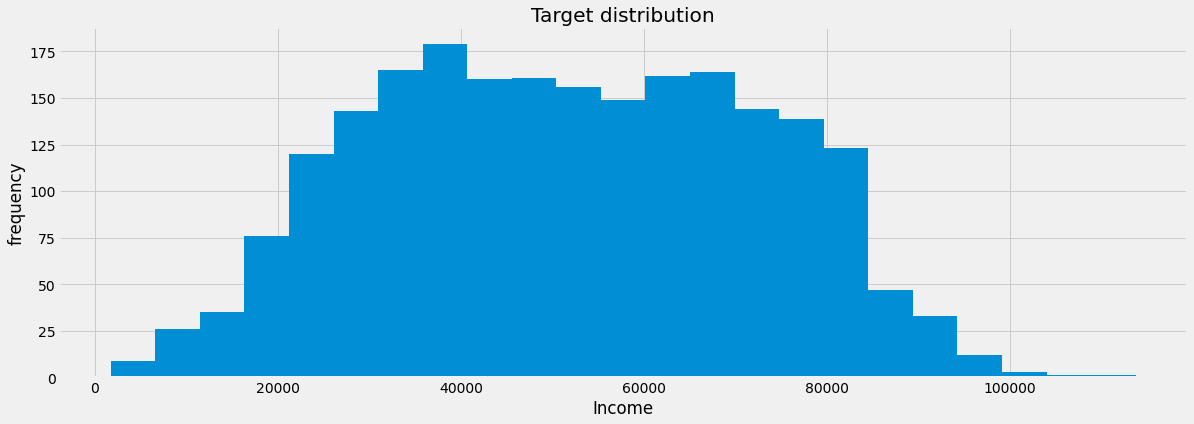

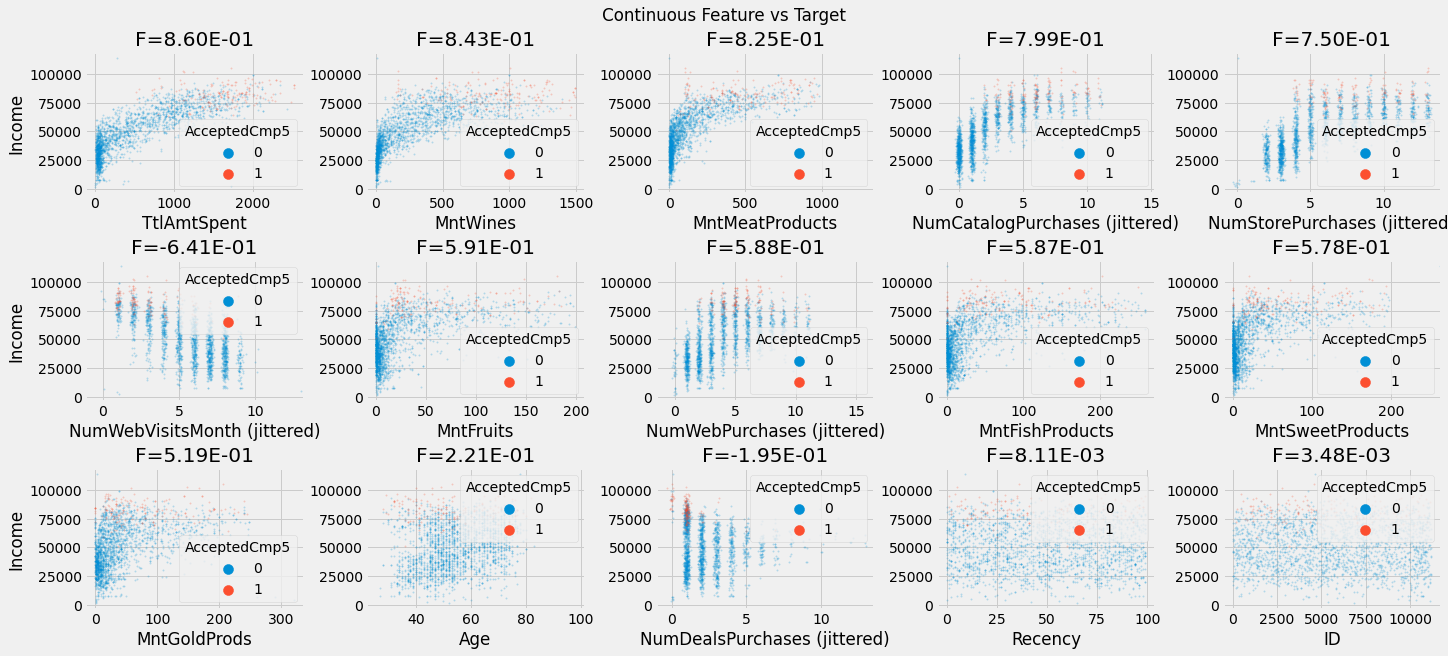

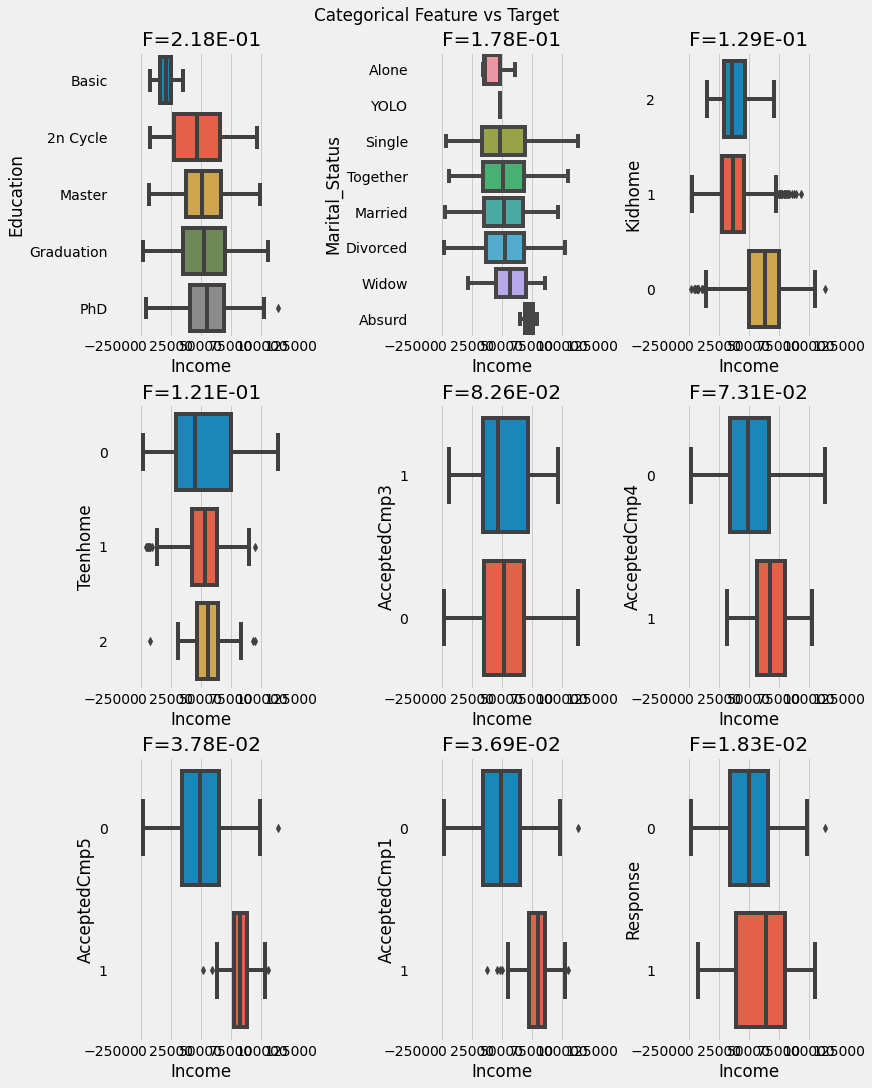

In [13]:
# Breakdown of Income using the data analysis library dabl
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'Income')

In [14]:
# Cleaning the Education column
data['Education'].replace({'Graduation':'Graduate', 'PhD':'Postgraduate', 'Basic':'Undergraduate','Master':'Postgraduate', '2n Cycle':'Postgraduate'}, inplace=True)
data['Education'].unique()

fig = px.bar(
    data["Education"].value_counts(normalize=True),
    title = "Proportion of Customer's Education Level",
    height=500
)
fig.update_layout(yaxis_title = "Percentage")
fig.show()

After we have cleaned our Education column we can see that majority of our customers have had a bachelors degree and about 40 percent have had some sort of postgraduate.



In [15]:
# Cleaning the Marital Status column
data['Marital_Status'].replace({'Together':'Married', 'Divorced':'Single', 'Widow':'Single', 'Alone':'Single', 'Absurd':'Single', 'YOLO':'Single'}, inplace=True)
data['Marital_Status'].unique()

fig2 = px.bar(
    data["Marital_Status"].value_counts(normalize=True),
    title = "Proportion of Customer's Marital Status",
    height=500
)
fig2.update_layout(yaxis_title = "Percentage")
fig2.show()

we can see that majority of the customers are married, which would make sense considering their average age to be over 50

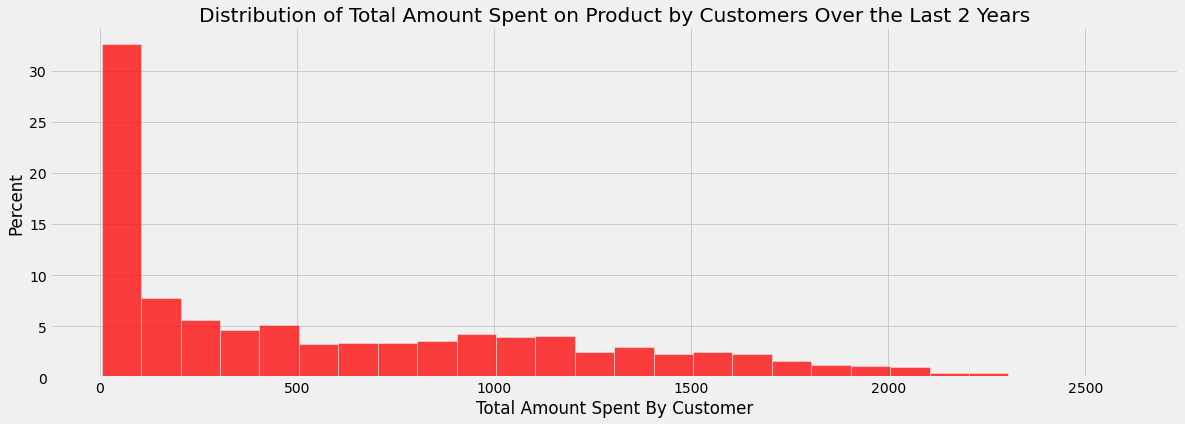

In [16]:
# Total Spent breakdown of customers
sns.histplot(data=data, x="TtlAmtSpent", binwidth=100, stat="percent", color='red', bins=list(range(0,2500,250)))
plt.xlabel('Total Amount Spent By Customer')
plt.title("Distribution of Total Amount Spent on Product by Customers Over the Last 2 Years");

It appears that about 0.33 of all customers spent around 100 with the company in the last 2 years.

Text(0.5, 0, 'Total Amount Spent')

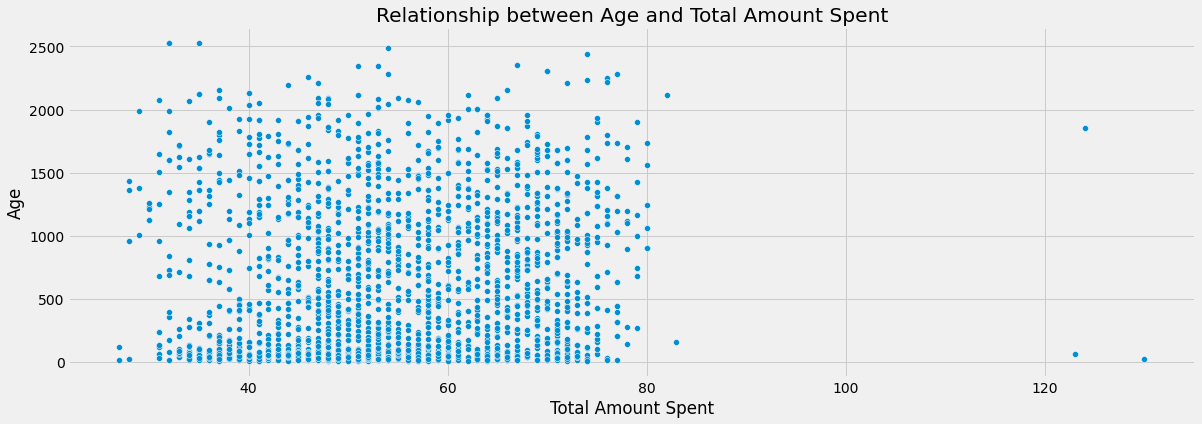

In [17]:
# Age vs Total Amount Spent

sns.scatterplot(data=data, x="Age", y="TtlAmtSpent")
plt.title("Relationship between Age and Total Amount Spent")
plt.ylabel('Age')
plt.xlabel('Total Amount Spent')

While we have some outliers of older people spending less with the company. Overall we can see there is not a strong linear relationship between age and the amount they spend with the company.

In [18]:
# We will group Age into ranges to make the model easier
def group_age(age):
    if age <20:
        return "11-20"
    elif age > 20 and age <31:
        return "21-30"
    elif age > 30 and age <41:
        return "31-40"
    elif age > 40 and age <51:
        return "41-50"
    elif age > 50 and age <61:
        return "51-60"
    elif age > 60 and age <71:
        return "61-70"
    elif age > 70 and age <81:
        return "71-80"
    elif age > 80:
        return ">80"

data['Age Group'] = data['Age'].apply(group_age)
order = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80"]

In [19]:
from scipy.stats import iqr

iqr = iqr(data["Income"], nan_policy="omit")
low = np.nanquantile(data["Income"], 0.25) - 1.5 * iqr
high = np.nanquantile(data["Income"], 0.75) + 1.5 * iqr
df_cut = data[data["Income"].between(low, high)]

In [20]:
# Lets compare age ranges and income 
mask = df_cut.groupby("Age Group")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Age Group", y="Income", height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

We can see that there is a slight increase in income as the age ranges increase. The only outlier is the 21-30 Age range.

In [21]:
# Let us compare education with the total amount spent by customers
mask = data.groupby("Education")["TtlAmtSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Education", y="TtlAmtSpent", height=500,
            title = "Average Spent by education type")

annotation = []
for x, y in zip(mask["Education"], mask["TtlAmtSpent"]):
    annotation.append(
        dict(x=x, y=y +20,
             text='$' + str(round(y, 2)),
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
fig.show()

We are now able to see how much the average Graduate, Postgraduate and Undergraduate spend with the company.

In [22]:
# Education VS Income

mask = df_cut.groupby("Education")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Education", y="Income", height=500,
            title = "Relationsip Between Customer's Education Level and Income")

annotation = []
for x, y in zip(mask["Education"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +1500,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)

fig.show()

We can see that the customers who are Graduates and Postgraduates do not differ significantly when it comes to their income. However, customers who have not graduated university earn significantly less on average.

In [23]:
# Amount of Kid's Home VS Total Amount Spent

In [24]:
mask = data.groupby("Kidhome")["TtlAmtSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Kidhome", y="TtlAmtSpent", height=500, 
             title="Relationship between Customers Having Kids and Total Amount Spent")

annotation = []
for x, y in zip(mask["Kidhome"], mask["TtlAmtSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

We ca see that customers who have kids spend a lot more on average than those who do not.

In [25]:
# Amount of Kids vs Income
mask = df_cut.groupby("Kidhome")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Kidhome", y="Income", height=500, title="Relationship between Kids at home and Total Amount Spent")

annotation = []
for x, y in zip(mask["Kidhome"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

It seemss that customers with 0 kids earn more than those without.

In [26]:
# Education VS Income VS TotalAmount
fig = px.scatter(
    data_frame=df_cut,
    x = "Income",
    y= "TtlAmtSpent",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "Education",
    height=500
)
fig.show()

We can see that the more income an individual has, which is typically either a Graduate or Postgraduate, the more they spend with the company.

####**Conclusion from EDA**

From the data we saw that income was a leading factor in the amount the customer spent with the company.

We can also see that education plays an important role as well as the amount of kids they have. i.e The more kids they have the less they spend with the company.

###**Modelling**

####**K-Means**

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data["Income"].fillna(data["Income"].median(), inplace=True)
df = data[["Income", "TtlAmtSpent"]]
df_log = np.log(df)
# Normalize the data
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)
# Fit the model
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

<AxesSubplot: title={'center': 'The Elbow Method'}, xlabel='K', ylabel='SSE'>

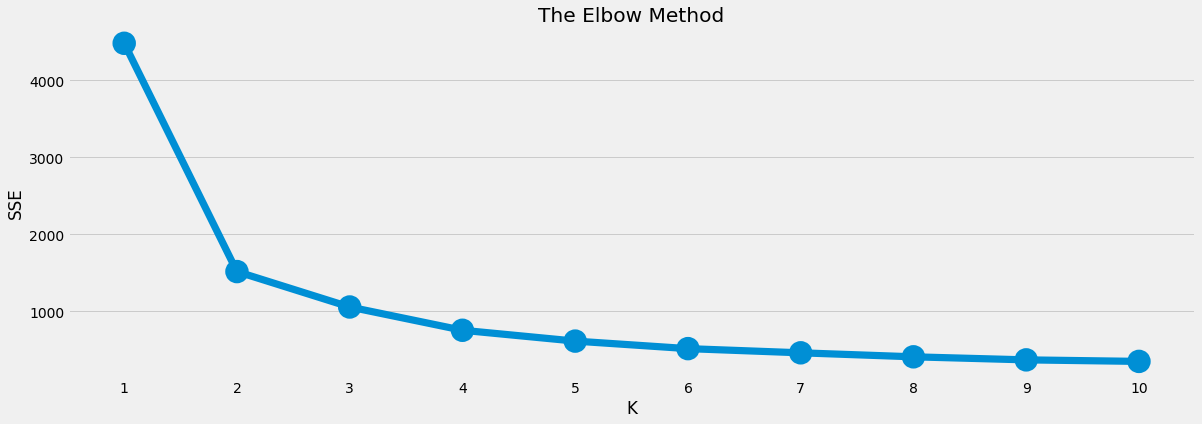

In [28]:
# Plot the prediction
plt.title('The Elbow Method')
plt.xlabel('K'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)


In [29]:
# We will use the kneed library to find the optimal cluster
from kneed import KneeLocator
k0 = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(k0.elbow))

The optimum number of clusters is: 3


We can see that the optimum clusters needed for our model will be 3 so we fit that into the model.

In [30]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [31]:
df = df.assign(ClusterLabel= model.labels_)
df.groupby("ClusterLabel")[["Income", "TtlAmtSpent"]].median()


,Income,TtlAmtSpent
ClusterLabel,,
0,25261.5,43.0
1,69084.0,1069.5
2,42641.0,145.0


In [32]:
fig = px.scatter(
    data_frame=df,
    x = "Income",
    y= "TtlAmtSpent",
    title = "Relationship between Income VS Total Amount Spent",
    color = "ClusterLabel",
    height=500
)
fig.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

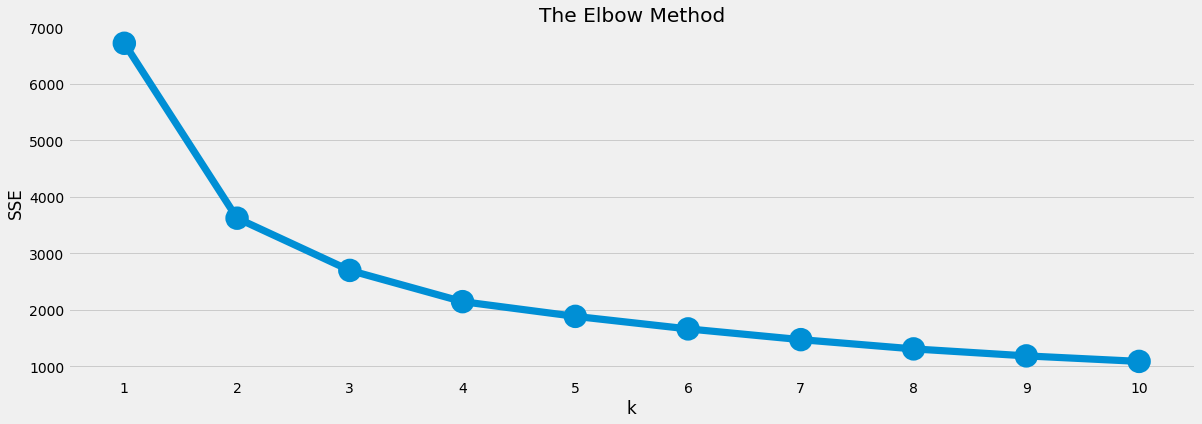

In [33]:
# Building the model with 3 features 
df = data[['Age','Income','TtlAmtSpent']]

df_log = np.log(df)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

sse = {}
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    sse[k] = model.inertia_

plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [38]:

model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)

df = df.assign(ClusterLabel= model.labels_)
result = df.groupby("ClusterLabel").agg({"Age":"mean", "Income":"median", "TtlAmtSpent":"median"}).round()

fig = px.scatter_3d(data_frame=df, x="Income", 
                    y="TtlAmtSpent", z="Age", color="ClusterLabel", height=550,
                   title = "Visualizing Cluster Result Using 3 Features")
fig.show()


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



After checking the 3d scatterplot we can see the relationship between Income, Age and the Total Amount Spent with the company.

The results of the K-Means breaks categorizes the customers into 3 groups:

*   Young Customers with high income and spend a lot on products
*   Old Customers with high income who also spend a lot on products
*   Young Customers with low income who do not spend a lot on products


###<center>**Thank you !!**</center>
<center><img src='https://www.callcentrehelper.com/images/stories/2007/05/pie-segment-760.jpg'></center>